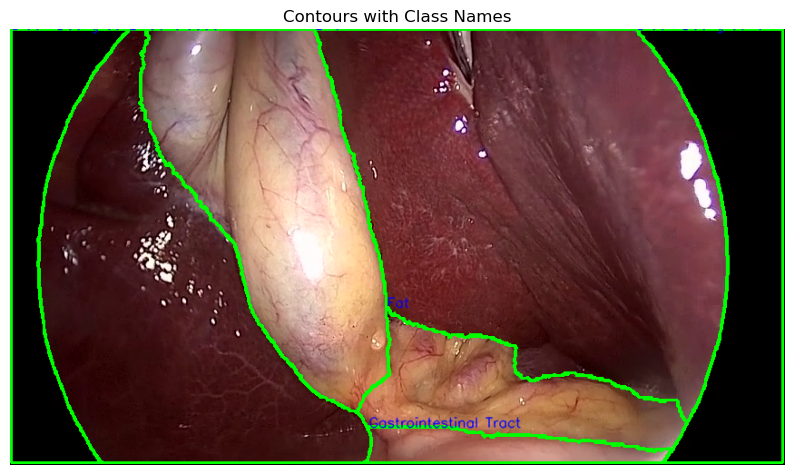

In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# === CONFIGURATION ===
image_path = "/student/vcheruku/Enhance-Data-Diversity-and-Robustness/cholecseg_prepared_1/images/all_images/video01_video01_00080_frame_100_endo.png"
label_path = "/student/vcheruku/Enhance-Data-Diversity-and-Robustness/cholecseg_prepared_1/labels/all_labels/video01_video01_00080_frame_100_endo.txt"

# === CLASS ID TO NAME MAPPING ===
class_map = {
    "0": "Black Background",
    "1": "Abdominal Wall",
    "2": "Liver",
    "3": "Gastrointestinal Tract",
    "4": "Fat",
    "5": "Grasper",
    "6": "Connective Tissue",
    "7": "Blood",
    "8": "Cystic Duct",
    "9": "L-hook Electrocautery",
    "10": "Gallbladder",
    "11": "Hepatic Vein",
    "12": "Liver Ligament"
}

# === LOAD IMAGE ===
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Image not found at: {image_path}")

height, width = img.shape[:2]

# === PARSE LABEL FILE AND DRAW CONTOURS ===
if not os.path.exists(label_path):
    raise FileNotFoundError(f"Label file not found at: {label_path}")

with open(label_path, 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) < 7:
            print(f"Skipping malformed line: {line.strip()}")
            continue

        class_id = parts[0]
        class_name = class_map.get(class_id, f"Class_{class_id}")  # fallback name

        coords = list(map(float, parts[1:]))

        if len(coords) % 2 != 0:
            print(f"Skipping line with odd number of coordinates: {line.strip()}")
            continue

        # Convert normalized coords to pixel points
        points = []
        for i in range(0, len(coords), 2):
            x = int(coords[i] * width)
            y = int(coords[i + 1] * height)
            points.append([x, y])

        # print(f"{class_name} (ID: {class_id}) → Points: {points}")

        # Convert to numpy array for OpenCV
        contour = np.array([points], dtype=np.int32)

        # Draw contour
        cv2.drawContours(img, [contour], -1, (0, 255, 0), 2)

        # Draw class name at the first point
        if points:
            cv2.putText(img, class_name, tuple(points[0]), cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, (255, 0, 0), 1, cv2.LINE_AA)

# === DISPLAY RESULT ===
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.title("Contours with Class Names")
plt.axis("off")
plt.show()
